# Report the experiment consensus algorithm

### Import modules of consensus algorithm

In [21]:
from consensus.PBFT_Simulator import PBFT_Simulator
from consensus.QPBFT_Simulator import QPBFT_Simulator
from consensus.Proposed_Simulator import Proposed_Simulator
import time
import numpy as np

## Evaluatoin function

Set up control-variable

In [22]:
MAX_NUM_REQUESTS = 300
num_requests = np.array([i for i in range(10, MAX_NUM_REQUESTS + 1, 10)])
MAX_NUM_NODES = 100
num_nodes = np.array([i for i in range(10, MAX_NUM_NODES + 1, 5)])
SEED = 100

In [23]:
# All functions in this cell are Transmission Latency (TL) and Probaility of Proving Messages Successfully (PPMS) after sending requests
def evaluation_pbft_request(num_request:int, num_nodes:int, num_rounds:int):
    delays = np.array([])
    probabilities = np.array([])
    consensus = PBFT_Simulator(num_nodes)

    total_delay = 0
    for round in range(1, num_rounds+1):
        start = time.perf_counter()
        for request in range(1, num_request+1):
            consensus.send_request(f"Hello world {round} {request}")
        end = time.perf_counter()
        total_delay += (end - start) * 1000 # ms
        delays = np.append(delays, total_delay)
        probabilities = np.append(probabilities, consensus.success_proof / (round*request*1.0))
    
    return {
        "delays" : delays,
        "probabilities" : probabilities
    }

def evaluation_qpbft_request(num_request:int, num_managing:int, num_voting:int, num_rounds:int):
    delays = np.array([])
    probabilities = np.array([])
    consensus = QPBFT_Simulator(num_managing, num_voting)

    total_delay = 0
    for round in range(1, num_rounds+1):
        start = time.perf_counter()
        for request in range(1, num_request+1):
            consensus.send_request(f"Hello world {round} {request}")
        end = time.perf_counter()
        total_delay += (end - start) * 1000 # ms
        delays = np.append(delays, total_delay)
        probabilities = np.append(probabilities, consensus.success_proof / (round*request*1.0))
    
    return {
        "delays" : delays,
        "probabilities" : probabilities
    }

def evaluation_proposed_scheme_request(num_request:int, num_master:int, num_slave:int,  num_random:int, num_rounds:int):
    delays = np.array([])
    probabilities = np.array([])
    consensus = Proposed_Simulator(num_master, num_slave, num_random)

    total_delay = 0
    for round in range(1, num_rounds+1):
        start = time.perf_counter()
        for request in range(1, num_request+1):
            consensus.send_request(f"Hello world {round} {request}")
        end = time.perf_counter()
        total_delay += (end - start) * 1000 # ms
        delays = np.append(delays, total_delay)
        probabilities = np.append(probabilities, consensus.success_proof / (round*request*1.0))
    
    return {
        "delays" : delays,
        "probabilities" : probabilities
    }

In [24]:
# Throughput and the number of messages exchanged on the number of nodes
def evaluation_pbft_nodes(num_nodes:np.ndarray, num_rounds:int):
    throughputs = np.array([], dtype="f")
    exchange_messages = {
        "send" : np.array([], dtype="i"),
        "receive" : np.array([], dtype="i")
    }

    for num_node in num_nodes:
        consensus = PBFT_Simulator(num_node)

        start = time.perf_counter()
        for round in range(num_rounds):
            consensus.send_request(f"Hello world {round}")
        end = time.perf_counter()

        delay = end-start
        throughput = np.round(num_rounds / delay) # transactions/s
        throughputs = np.append(throughputs, throughput)
        total_send_receive_message = consensus.total_send_receive_messages()
        exchange_messages["send"] = np.append(exchange_messages["send"], total_send_receive_message["total_send"])
        exchange_messages["receive"] = np.append(exchange_messages["receive"], total_send_receive_message["total_receive"])

        del consensus
    
    return {
        "throughputs" : throughputs,
        "total_send" : exchange_messages["send"],
        "total_receive" : exchange_messages["receive"]
    }

def evaluation_qpbft_nodes(num_nodes:np.ndarray, num_rounds:int, seed:int=0):
    throughputs = np.array([], dtype="f")
    exchange_messages = {
        "send" : np.array([], dtype="i"),
        "receive" : np.array([], dtype="i")
    }

    for num_node in num_nodes:

        np.random.seed(seed)
        num_managing = np.random.randint(1, num_node//2)
        num_voting = num_node - num_managing

        consensus = QPBFT_Simulator(num_managing, num_voting)

        start = time.perf_counter()
        for round in range(num_rounds):
            consensus.send_request(f"Hello world {round}")
        end = time.perf_counter()

        delay = end-start
        throughput = np.round(num_rounds / delay) # transactions/s
        throughputs = np.append(throughputs, throughput)
        total_send_receive_message = consensus.total_send_receive_messages()
        exchange_messages["send"] = np.append(exchange_messages["send"], total_send_receive_message["total_send"])
        exchange_messages["receive"] = np.append(exchange_messages["receive"], total_send_receive_message["total_receive"])

    return {
        "throughputs" : throughputs,
        "total_send" : exchange_messages["send"],
        "total_receive" : exchange_messages["receive"]
    }

def evaluation_proposed_nodes(num_nodes:np.ndarray, num_rounds:int, k:int, seed:int=0):
    throughputs = np.array([], dtype="f")
    exchange_messages = {
        "send" : np.array([], dtype="i"),
        "receive" : np.array([], dtype="i")
    }

    for num_node in num_nodes:
        
        np.random.seed(seed)
        num_master = np.random.randint(1, num_node//2)
        num_slave = num_node - num_master

        consensus = Proposed_Simulator(num_master, num_slave, k)

        start = time.perf_counter()
        for round in range(num_rounds):
            consensus.send_request(f"Hello world {round}")
        end = time.perf_counter()

        delay = end-start
        throughput = np.round(num_rounds / delay) # transactions/s
        throughputs = np.append(throughputs, throughput)
        total_send_receive_message = consensus.total_send_receive_messages()
        exchange_messages["send"] = np.append(exchange_messages["send"], total_send_receive_message["total_send"])
        exchange_messages["receive"] = np.append(exchange_messages["receive"], total_send_receive_message["total_receive"])

    return {
        "throughputs" : throughputs,
        "total_send" : exchange_messages["send"],
        "total_receive" : exchange_messages["receive"]
    }

## PBFT Algorithm

In [25]:
result_pbft_request = evaluation_pbft_request(10, 10, 30)
result_pbft_nodes = evaluation_pbft_nodes(num_nodes, 1)

## QPBFT Algorithm

In [26]:
result_qpbft_request = evaluation_qpbft_request(10, 6, 4, 30)
result_qpbft_nodes = evaluation_qpbft_nodes(num_nodes, 1, SEED)

## Proposed Scheme 1
> num_random = 4

In [27]:
result_proposed_request_1 = evaluation_proposed_scheme_request(10, 6, 4, 4, 30)
result_proposed_nodes_1 = evaluation_proposed_nodes(num_nodes, 1, 4, SEED)

> num_random = 6

In [28]:
result_proposed_request_2 = evaluation_proposed_scheme_request(10, 6, 4, 6, 30)
result_proposed_nodes_2 = evaluation_proposed_nodes(num_nodes, 1, 6, SEED)

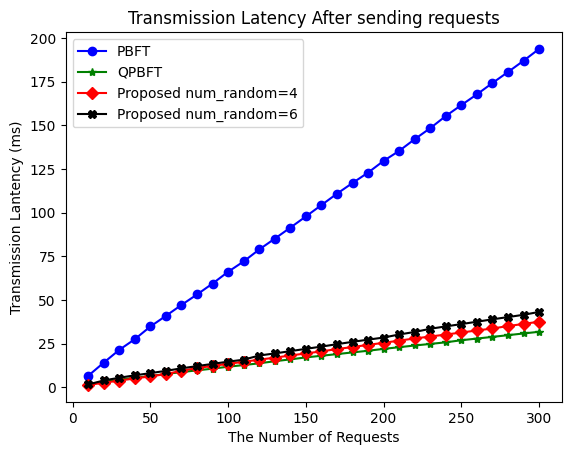

In [29]:
import matplotlib.pyplot as plt

plt.plot(num_requests, result_pbft_request["delays"], label = "PBFT", marker="o", color="blue")
plt.plot(num_requests, result_qpbft_request["delays"], label = "QPBFT", marker="*", color="green")
plt.plot(num_requests, result_proposed_request_1["delays"], label = "Proposed num_random=4", color="red", marker="D")
plt.plot(num_requests, result_proposed_request_2["delays"], label = "Proposed num_random=6", color="black", marker="X")
plt.legend()
plt.xlabel("The Number of Requests")
plt.ylabel("Transmission Lantency (ms)")
plt.title("Transmission Latency After sending requests")
plt.show()

In [30]:
print(f"Transmission latency of PBFT in 300 requests is {np.max(result_pbft_request["delays"]):.2f}")
print(f"Transmission latency of QPBFT in 300 requests is {np.max(result_qpbft_request["delays"]):.2f}")
print(f"Transmission latency of Proposed (num_random=4) in 300 requests is {np.max(result_proposed_request_1["delays"]):.2f}")
print(f"Transmission latency of Proposed (num_random=6) in 300 requests is {np.max(result_proposed_request_2["delays"]):.2f}")

Transmission latency of PBFT in 300 requests is 193.74
Transmission latency of QPBFT in 300 requests is 31.77
Transmission latency of Proposed (num_random=4) in 300 requests is 37.55
Transmission latency of Proposed (num_random=6) in 300 requests is 43.15


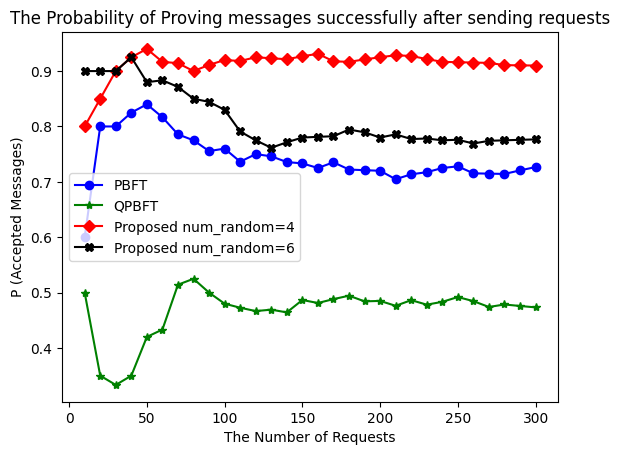

In [31]:
plt.plot(num_requests, result_pbft_request["probabilities"], label = "PBFT", marker="o", color="blue")
plt.plot(num_requests, result_qpbft_request["probabilities"], label = "QPBFT", marker="*", color="green")
plt.plot(num_requests, result_proposed_request_1["probabilities"], label = "Proposed num_random=4", color="red", marker="D")
plt.plot(num_requests, result_proposed_request_2["probabilities"], label = "Proposed num_random=6", color="black", marker="X")
plt.legend()
plt.xlabel("The Number of Requests")
plt.ylabel("P (Accepted Messages)")
plt.title("The Probability of Proving messages successfully after sending requests")
plt.show()

In [32]:
print(f"Mean of pbft's probability {np.mean(result_pbft_request["probabilities"]):.2f}")
print(f"Mean of qpbft's probability {np.mean(result_qpbft_request["probabilities"]):.2f}")
print(f"Mean of proposed (num_random=4)'s probability {np.mean(result_proposed_request_1["probabilities"]):.2f}")
print(f"Mean of proposed (num_random=6)'s probability {np.mean(result_proposed_request_2["probabilities"]):.2f}")

Mean of pbft's probability 0.74
Mean of qpbft's probability 0.47
Mean of proposed (num_random=4)'s probability 0.91
Mean of proposed (num_random=6)'s probability 0.81


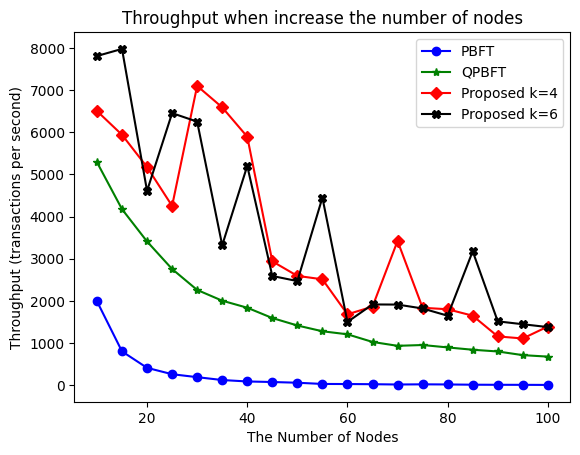

In [33]:
plt.plot(num_nodes, result_pbft_nodes["throughputs"], label="PBFT", marker="o", color="blue")
plt.plot(num_nodes, result_qpbft_nodes["throughputs"], label="QPBFT", marker="*", color="green")
plt.plot(num_nodes, result_proposed_nodes_1["throughputs"], label="Proposed k=4", marker="D", color="red")
plt.plot(num_nodes, result_proposed_nodes_2["throughputs"], label="Proposed k=6", marker="X", color="black")
plt.legend()
plt.xlabel("The Number of Nodes")
plt.ylabel("Throughput (transactions per second)")
plt.title("Throughput when increase the number of nodes")
plt.show()

In [34]:
print(f"Mean of pbft's throughput {np.mean(result_pbft_nodes["throughputs"]):.2f}")
print(f"Mean of qpbft's throughput {np.mean(result_qpbft_nodes["throughputs"]):.2f}")
print(f"Mean of proposed (num_random=4)'s throughput {np.mean(result_proposed_nodes_1["throughputs"]):.2f}")
print(f"Mean of proposed (num_random=6)'s throughput {np.mean(result_proposed_nodes_2["throughputs"]):.2f}")

Mean of pbft's throughput 221.00
Mean of qpbft's throughput 1793.63
Mean of proposed (num_random=4)'s throughput 3442.16
Mean of proposed (num_random=6)'s throughput 3549.16


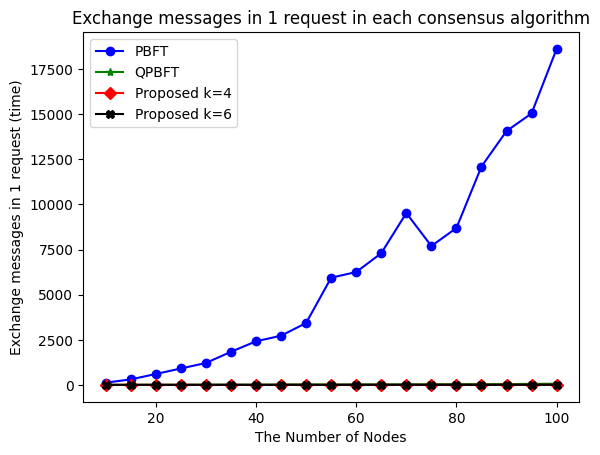

In [35]:
plt.plot(num_nodes, result_pbft_nodes["total_send"], label="PBFT", marker="o", color="blue")
plt.plot(num_nodes, result_qpbft_nodes["total_send"], label="QPBFT", marker="*", color="green")
plt.plot(num_nodes, result_proposed_nodes_1["total_send"], label="Proposed k=4", marker="D", color="red")
plt.plot(num_nodes, result_proposed_nodes_2["total_send"], label="Proposed k=6", marker="X", color="black")
plt.legend()
plt.xlabel("The Number of Nodes")
plt.ylabel("Exchange messages in 1 request (time)")
plt.title("Exchange messages in 1 request in each consensus algorithm")
plt.show()

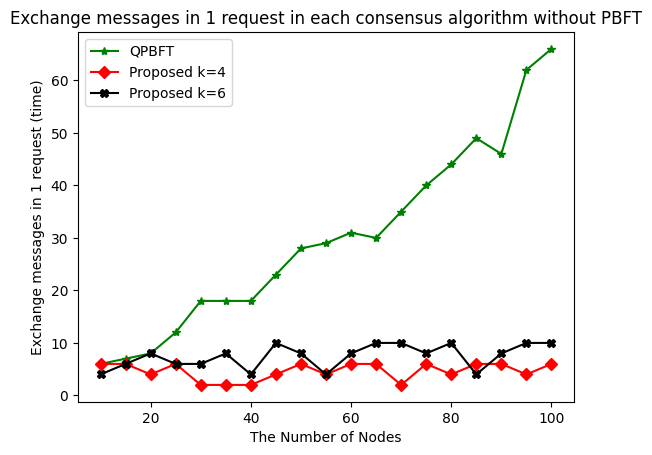

In [36]:
# plt.plot(num_nodes, result_pbft_nodes["total_send"], label="PBFT", marker="o", color="blue")
plt.plot(num_nodes, result_qpbft_nodes["total_send"], label="QPBFT", marker="*", color="green")
plt.plot(num_nodes, result_proposed_nodes_1["total_send"], label="Proposed k=4", marker="D", color="red")
plt.plot(num_nodes, result_proposed_nodes_2["total_send"], label="Proposed k=6", marker="X", color="black")
plt.legend()
plt.xlabel("The Number of Nodes")
plt.ylabel("Exchange messages in 1 request (time)")
plt.title("Exchange messages in 1 request in each consensus algorithm without PBFT")
plt.show()

In [37]:
print(f"Mean of pbft's exchanging messages {np.mean(result_pbft_nodes["total_send"]):.2f}")
print(f"Mean of qpbft's exchanging messages {np.mean(result_qpbft_nodes["total_send"]):.2f}")
print(f"Mean of proposed (num_random=4)'s exchanging messages {np.mean(result_proposed_nodes_1["total_send"]):.2f}")
print(f"Mean of proposed (num_random=6)'s exchanging messages {np.mean(result_proposed_nodes_2["total_send"]):.2f}")

Mean of pbft's exchanging messages 6252.21
Mean of qpbft's exchanging messages 30.00
Mean of proposed (num_random=4)'s exchanging messages 4.63
Mean of proposed (num_random=6)'s exchanging messages 7.47
